# Proyek Analisis Data: Bike Sharing Dataset
Nama: [Regina Kembar Duanti]
Email: [reginakd07@student.ub.ac.id]
ID Dicoding: [reginakd07]

# Menentukan Pertanyaan Bisnis
Pertanyaan 1 : Bagaimana pengaruh temperatur terhadap jumlah penyewaan sepeda setiap bulan?
Pertanyaan 2 : Bagaimana pengaruh kelembapan dan windspeed terhadap jumlah penyewaan sepeda setiap bulan?

# Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# Gathering Data

In [5]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data

Assessing Data of Day Table

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assessing Data of Hour Table

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning Data

Cleaning Data of Day Table (data type is wrong)

In [16]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cleaning Data of Hour Table (data type is wrong)

In [19]:
hour_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis (EDA)

Explore Day_df Data

In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [23]:
day_df.groupby(by="temp").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
temp,,
0.059130,93,888
0.096522,150,836
0.097391,86,1330
0.107500,95,2273
0.127500,73,1456
...,...,...
0.834167,829,4634
0.838333,670,3176
0.848333,562,2825


In [68]:
day_df.groupby(by="hum").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
hum,,
0.000000,46,577
0.187917,532,1103
0.254167,3252,3605
0.275833,2230,2939
0.290000,531,4571
...,...,...
0.948261,114,491
0.949583,126,2468
0.962500,69,1538


In [24]:
day_df.groupby(by=["atemp"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
atemp,,
0.079070,93,888
0.098839,150,836
0.101658,73,1456
0.116175,54,768
0.117930,86,1330
...,...,...
0.794829,1050,2556
0.804287,987,2298
0.804913,1448,3392


In [30]:
day_df.groupby(by=["windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
windspeed,,
0.022392,949,4036
0.042304,1514,3603
0.045404,2235,3174
0.045408,120,1592
0.046650,337,4750
...,...,...
0.417908,208,1705
0.421642,317,2415
0.422275,471,3724


In [31]:
day_df.groupby(by=["temp","atemp"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,,casual,registered
temp,atemp,,
0.059130,0.079070,93,888
0.096522,0.098839,150,836
0.097391,0.117930,86,1330
0.107500,0.119337,95,2273
0.127500,0.101658,73,1456
...,...,...,...
0.834167,0.786613,829,4634
0.838333,0.785967,670,3176
0.848333,0.840896,562,2825


In [32]:
day_df.groupby(by=["hum","windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,,casual,registered
hum,windspeed,,
0.000000,0.261877,46,577
0.187917,0.507463,532,1103
0.254167,0.274871,3252,3605
0.275833,0.232596,2230,2939
0.290000,0.187192,531,4571
...,...,...,...
0.948261,0.343287,114,491
0.949583,0.232583,126,2468
0.962500,0.118792,69,1538


Explore Hour_df Data

In [74]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [26]:
hour_df.groupby(by="temp").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
temp,,
0.02,16,696
0.04,28,542
0.06,44,628
0.08,33,447
0.10,85,2429
0.12,169,4271
0.14,336,7269
0.16,802,14281
0.18,513,8805


In [27]:
hour_df.groupby(by="atemp").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
atemp,,
0.0000,4,35
0.0152,0,13
0.0303,5,106
0.0455,1,293
0.0606,24,662
...,...,...
0.9091,272,1268
0.9242,248,1033
0.9545,20,95


In [28]:
day_df.groupby(by="hum").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
hum,,
0.000000,46,577
0.187917,532,1103
0.254167,3252,3605
0.275833,2230,2939
0.290000,531,4571
...,...,...
0.948261,114,491
0.949583,126,2468
0.962500,69,1538


In [29]:
day_df.groupby(by=["windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
windspeed,,
0.022392,949,4036
0.042304,1514,3603
0.045404,2235,3174
0.045408,120,1592
0.046650,337,4750
...,...,...
0.417908,208,1705
0.421642,317,2415
0.422275,471,3724


In [33]:
hour_df.groupby(by=["temp","atemp"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
temp atemp                     
0.02 0.0000       1          26
     0.0152       0          13
     0.0303       0           2
     0.0455       1         226
     0.0606       9         335
...             ...         ...
0.96 0.8636     591        1989
     0.9091     232         894
     1.0000      24          77
0.98 0.9242      82         457
1.00 0.8636     102         192

[294 rows x 2 columns]

In [34]:
hour_df.groupby(by=["hum","windspeed"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
hum windspeed                    
0.0 0.0896          1          26
    0.1343          4          30
    0.1642          0          17
    0.1940          1           2
    0.2239         11         138
...               ...         ...
1.0 0.3582          0          23
    0.3881          0          10
    0.4179          3          57
    0.4478          0           5
    0.4925          0          11

[1357 rows x 2 columns]

# Visualization & Explanatory Analysis

Pertanyaan 1 : Bagaimana pengaruh temperatur terhadap jumlah penyewaan sepeda setiap bulan?

In [62]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum",
    "temp": "sum",
    "atemp": "sum"
})

monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.head(12)

,dteday,cnt,temp,atemp
0,January,38189,6.128907,6.339177
1,February,48215,7.911122,7.963547
2,March,64045,10.281664,10.084274
3,April,94870,14.135653,13.703247
4,May,135821,17.894168,17.075222
5,June,143512,20.792500,19.396783
6,July,141341,23.515835,22.030465
7,August,136691,21.866226,20.317870
8,September,127418,18.386597,17.056351
9,October,123511,14.569241,14.222063


In [63]:
firstyear_df = monthly_df.head(12)

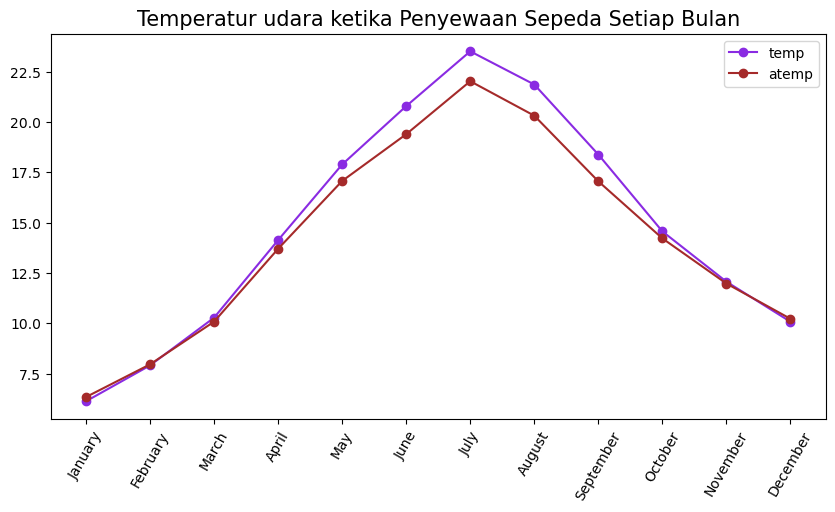

In [64]:
plt.figure(figsize=(10, 5))
x = firstyear_df["dteday"]
y1 = firstyear_df["temp"]
y2 = firstyear_df["atemp"]

plt.plot(x, y1, marker='o', color='#8A2BE2')
plt.plot(x, y2, marker='o', color='#A52A2A')
plt.xticks(x, rotation=60)
plt.title("Temperatur udara ketika Penyewaan Sepeda Setiap Bulan", loc="center", fontsize=15)
plt.legend(["temp", "atemp"])
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

Pertanyaan 2 : Bagaimana pengaruh kelembapan dan windspeed terhadap jumlah penyewaan sepeda setiap bulan?

In [42]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum",
    "hum": "sum",
    "windspeed": "sum"
})

monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.head(12)

,dteday,cnt,hum,windspeed
0,January,38189,18.115357,6.057983
1,February,48215,15.682607,6.399905
2,March,64045,17.651829,7.204641
3,April,94870,20.048622,7.326492
4,May,135821,22.114166,5.619503
5,June,143512,17.797499,5.345861
6,July,141341,18.279583,5.321689
7,August,136691,19.431765,5.912337
8,September,127418,23.521613,4.589682
9,October,123511,21.910635,5.446252


In [53]:
firstyear_df = monthly_df.head(12)

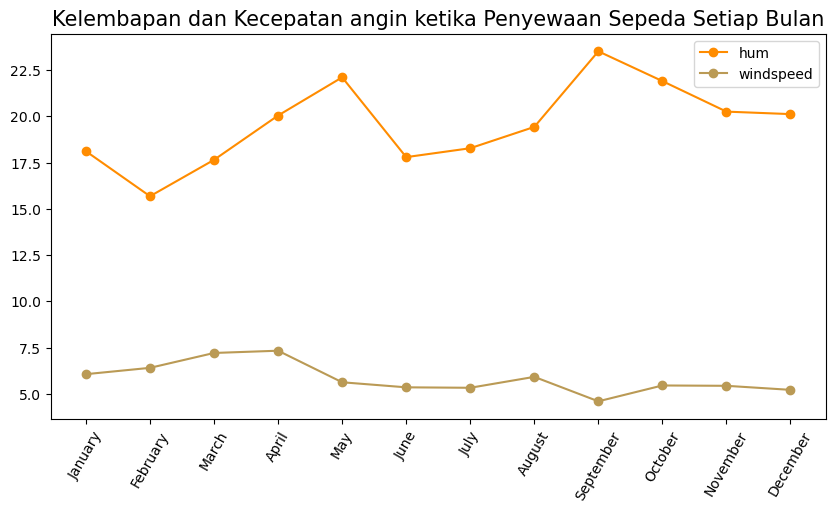

In [57]:
plt.figure(figsize=(10, 5))
x = firstyear_df["dteday"]
y1 = firstyear_df["hum"]
y2 = firstyear_df["windspeed"]

plt.plot(x, y1, marker='o', color='#FF8C00')
plt.plot(x, y2, marker='o', color='#BA9A55')
plt.xticks(x, rotation=60)
plt.title("Kelembapan dan Kecepatan angin ketika Penyewaan Sepeda Setiap Bulan", loc="center", fontsize=15)
plt.legend(["hum", "windspeed"])
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

# Conclusion

Conclusion pertanyaan 1 : Sesuai dengan pertanyaannya yaitu pengaruh temperatur terhadap jumlah penyewaan sepeda setiap bulan, grafik visualisasi data menunjukkan perbedaan yang tidak terlalu signifikan antara temperatur yang dirasa dan temperatur sebenarnya.
Conclusion pertanyaan 2 : Sesuai dengan pertanyaannya yaitu pengaruh kelembapan dan windspeed terhadap jumlah penyewaan sepeda setiap bulan, grafik visualisasi data menunjukkan hasil yang berbeda antara kelembapan vs windspeed. kecepatan angin relatif rendah disaat kelembapan tinggi.